<h1 style="font-size: 30px; color:orange;">Convolutional Autoencoder (CAE) on the MNIST-Dataset using Tensorflow</h1>
<h2 style="font-size: 20px;">Authors: Bruno Figura & Daniel Labuda, ML II Projektarbeit Gruppe 2, SoSe24</h2>
-----------------------------------------------------------------------------------------------------


In [18]:
import numpy as np
import os
import matplotlib.pyplot as plt
import keras
from datetime import datetime
import seaborn as sns

from keras.datasets import mnist
import tensorflow as tf
from keras.models import Model
from keras import layers, models, Input
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report

if not os.path.exists('MNIST_backups'):
    os.makedirs('MNIST_backups')

Split the imported dataset into training and test data. Preprocess (reshape and normalize) the dataset. Print out the shapes of the resulting tensors.

Training data shape:
 (60000, 28, 28, 1) 

Test data shape:
 (10000, 28, 28, 1) 

Training labels shape:
 (60000, 10) 

Test labels shape:
 (10000, 10)


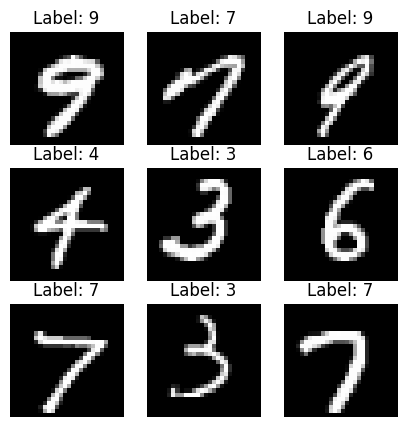

In [19]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

train_data = train_data.reshape(train_data.shape[0], 28, 28, 1)
test_data = test_data.reshape(test_data.shape[0], 28, 28, 1)

train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

train_data /= 255
test_data /= 255

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

print("Training data shape:\n", train_data.shape, "\n")
print("Test data shape:\n", test_data.shape, "\n")
print("Training labels shape:\n", train_labels.shape, "\n")
print("Test labels shape:\n", test_labels.shape)

random_indices = np.random.choice(train_data.shape[0], 9, replace=False)
random_digits = train_data[random_indices]

plt.figure(figsize=(5, 5))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(random_digits[i], cmap='gray')
    plt.title(f"Label: {np.argmax(train_labels[random_indices[i]])}")
    plt.axis('off')
plt.show()

Define the CNN-Autoencoder (CAE) model

In [20]:
# Encoder
input_img = Input(shape=(28, 28, 1))

# 1st convolution layer
x = layers.Conv2D(4, (5, 5), padding='same', activation='relu')(input_img)
x = layers.MaxPooling2D(pool_size=(2, 2), padding='same')(x)

# 2nd convolution layer
x = layers.Conv2D(16, (5, 5), padding='same', activation='relu')(x)
encoded = layers.MaxPooling2D(pool_size=(2, 2), padding='same')(x)

# Decoder
x = layers.Conv2D(16, (5, 5), padding='same', activation='relu')(encoded)
x = layers.UpSampling2D((2, 2))(x)

x = layers.Conv2D(4, (5, 5), padding='same', activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)

decoded = layers.Conv2D(1, (5, 5), padding='same', activation='sigmoid')(x)


# Autoencoder Model
autoencoder = Model(input_img, decoded)


# Classifier on top of Encoder
x = layers.Flatten()(encoded)

x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.25)(x)

x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.25)(x)

output = layers.Dense(10, activation='softmax')(x)
x = layers.Dropout(0.25)(x)

# Full model including classifier
full_model = Model(input_img, output)

autoencoder.summary()
full_model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_25 (Conv2D)          (None, 28, 28, 4)         104       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 14, 14, 4)         0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 14, 14, 16)        1616      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 7, 7, 16)          0         
 ng2D)                                                           
                                                                 
 conv2d_27 (Conv2D)          (None, 7, 7, 16)          641

Compile and train the previously defined architecture on the preprocessed dataset.

In [21]:
# Compile and train the autoencoder
EPOCHS=100
#autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
#autoencoder.fit(train_data, train_data, batch_size=256, epochs=EPOCHS, validation_data=(test_data, test_data))
#autoencoder.save('MNIST_backups/MNIST_AE_model_{}epochs_backup_{}.keras'.format(EPOCHS, datetime.now().strftime("%Y-%m-%d_%H-%M-%S")))

# Compile and train the full model
full_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
full_model.fit(train_data, train_labels, batch_size=256, epochs=EPOCHS, validation_data=(test_data, test_labels))
full_model.save('MNIST_backups/MNIST_CLASS-AE_model_{}epochs_backup_{}.keras'.format(EPOCHS, datetime.now().strftime("%Y-%m-%d_%H-%M-%S")))

Epoch 1/100
235/235 [==============================] - 35s 146ms/step - loss: 0.5248 - accuracy: 0.8367 - val_loss: 0.1231 - val_accuracy: 0.9605
Epoch 2/100
235/235 [==============================] - 33s 139ms/step - loss: 0.1538 - accuracy: 0.9539 - val_loss: 0.0816 - val_accuracy: 0.9748
Epoch 3/100
235/235 [==============================] - 43s 182ms/step - loss: 0.1093 - accuracy: 0.9675 - val_loss: 0.0599 - val_accuracy: 0.9804
Epoch 4/100
235/235 [==============================] - 32s 135ms/step - loss: 0.0894 - accuracy: 0.9743 - val_loss: 0.0494 - val_accuracy: 0.9829
Epoch 5/100
235/235 [==============================] - 32s 138ms/step - loss: 0.0752 - accuracy: 0.9783 - val_loss: 0.0446 - val_accuracy: 0.9853
Epoch 6/100
235/235 [==============================] - 37s 157ms/step - loss: 0.0678 - accuracy: 0.9803 - val_loss: 0.0390 - val_accuracy: 0.9870
Epoch 7/100
235/235 [==============================] - 36s 154ms/step - loss: 0.0614 - accuracy: 0.9815 - val_loss: 0.0348 -

Plot 5 random input-images to be ran through the CAE aswell as the results.

313/313 [==============================] - 11s 33ms/step


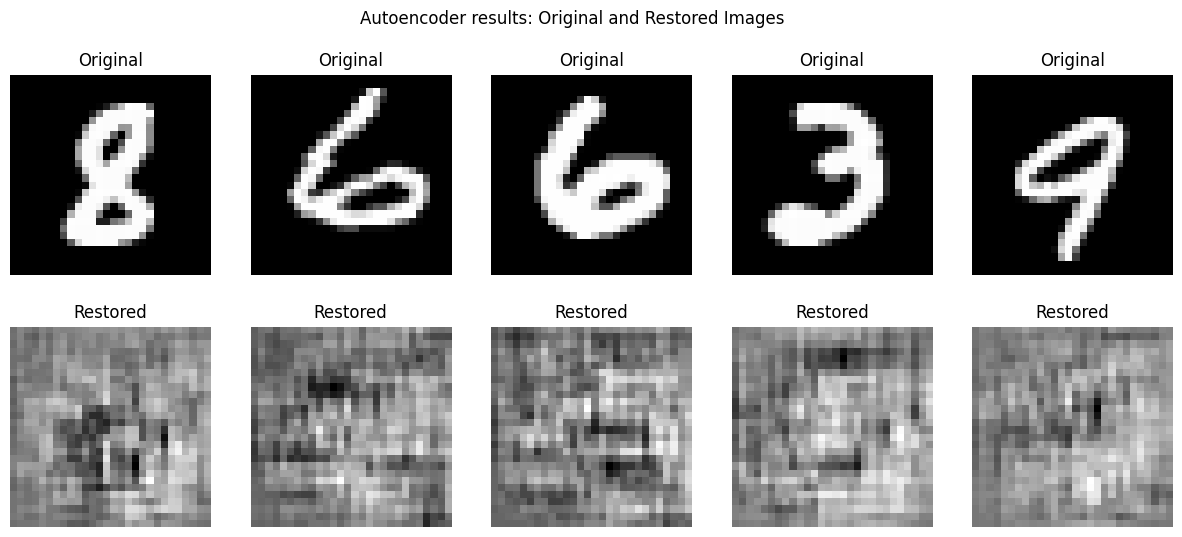

313/313 [==============================] - 6s 17ms/step


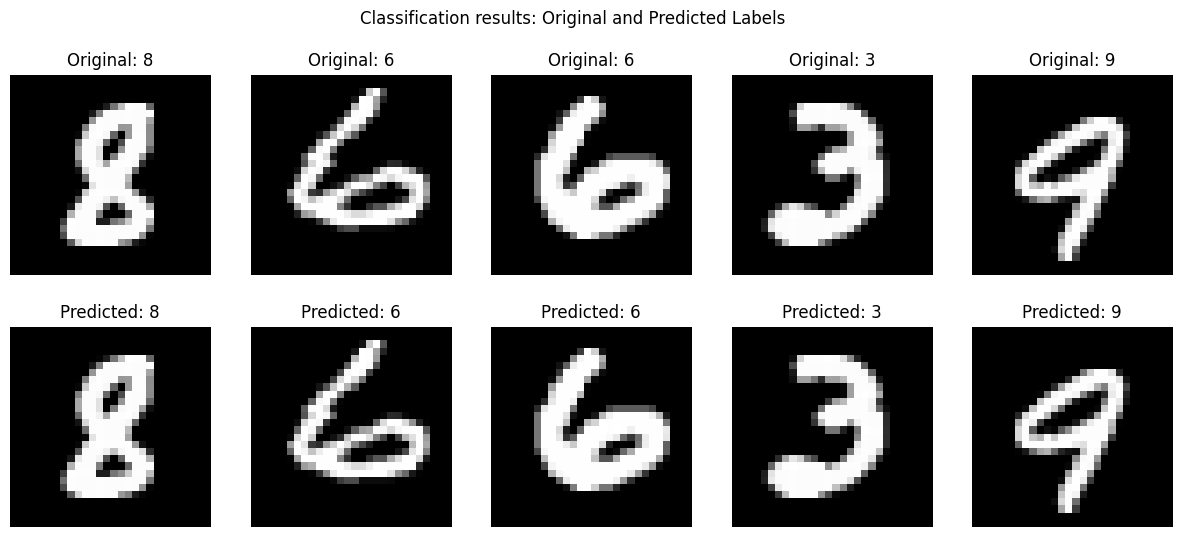

In [22]:
# Select 5 random test images
num_samples = test_data.shape[0]
indices = np.arange(num_samples)
np.random.shuffle(indices)

# Get the restored images from the autoencoder
restored_imgs = autoencoder.predict(test_data)

# Create a 2x5 grid for displaying results
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Autoencoder results: Original and Restored Images')

for i in range(5):
    random_index = indices[i]

    # Original images
    axes[0, i].imshow(test_data[random_index].reshape(28, 28), cmap='gray')
    axes[0, i].axis('off')
    axes[0, i].set_title('Original')

    # Restored images
    axes[1, i].imshow(restored_imgs[random_index].reshape(28, 28), cmap='gray')
    axes[1, i].axis('off')
    axes[1, i].set_title('Restored')

plt.show()

# Get predictions from the classifier
predictions = full_model.predict(test_data)

# Display classification results
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Classification results: Original and Predicted Labels')

for i in range(5):
    random_index = indices[i]

    # Original images
    axes[0, i].imshow(test_data[random_index].reshape(28, 28), cmap='gray')
    axes[0, i].axis('off')
    axes[0, i].set_title(f'Original: {np.argmax(test_labels[random_index])}')

    # Predicted labels
    axes[1, i].imshow(test_data[random_index].reshape(28, 28), cmap='gray')
    axes[1, i].axis('off')
    axes[1, i].set_title(f'Predicted: {np.argmax(predictions[random_index])}')

plt.show()

313/313 [==============================] - 5s 17ms/step


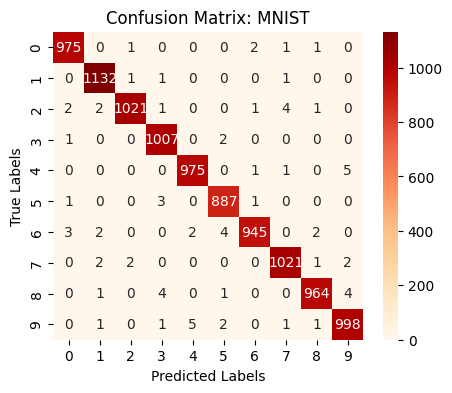

Classification Report:
               precision    recall  f1-score   support

           0      0.993     0.995     0.994       980
           1      0.993     0.997     0.995      1135
           2      0.996     0.989     0.993      1032
           3      0.990     0.997     0.994      1010
           4      0.993     0.993     0.993       982
           5      0.990     0.994     0.992       892
           6      0.995     0.986     0.991       958
           7      0.992     0.993     0.993      1028
           8      0.994     0.990     0.992       974
           9      0.989     0.989     0.989      1009

    accuracy                          0.993     10000
   macro avg      0.992     0.992     0.992     10000
weighted avg      0.993     0.993     0.992     10000



In [23]:
# Predict the labels for the test data
predicted_labels = np.argmax(full_model.predict(test_data), axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='OrRd', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix: MNIST')
plt.show()

report = classification_report(true_labels, predicted_labels, digits=3)
print('Classification Report:\n', report)
